# MedVAE Generalization

MedVAE is a variational autoencoder whose 2d model was trained on chest X-rays and FFDM images. However, as you will see with this notebook, the 2d model can be used to very effectively embed and reconstruct OCT images desipte it not having been trained on OCT images at all.

## 1. Load the model and preprocess the images

For now, we will keep everything on the CPU since the model is fairly lightweight. Some minor adjustments may be needed to run the model on a GPU.

In [1]:
import torch
from medvae.medvae_main import MVAE 
import numpy as np
import os
import matplotlib.pyplot as plt

device = "cpu"

/home/hasith/miniconda3/envs/medvae-env/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [2]:
model_2d_mmr_8 = MVAE(model_name="medvae_8_1_2d", modality="ct").to(device)

# load the images
fpath_cnv = "data/cnv_data/CNV-53018-1.jpeg"
fpath_mmr = "data/mmg_data/isJV8hQ2hhJsvEP5rdQNiy.png"

img_mmr = model_2d_mmr_8.apply_transform(fpath_mmr)
img_cnv = model_2d_mmr_8.apply_transform(fpath_cnv)

print(f"MMR Image Shape: {img_mmr.shape}")
print(f"MMR Image Min Value: {torch.min(img_mmr)}")
print(f"MMR Image Max Value: {torch.max(img_mmr)}")
print("\n")
print(f"PET Image Shape: {img_cnv.shape}")
print(f"PET Image Min Value: {torch.min(img_cnv)}")
print(f"PET Image Max Value: {torch.max(img_cnv)}")

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 1, 64, 64) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Restored from /home/hasith/.cache/huggingface/hub/models--stanfordmimi--MedVAE/snapshots/a5b84a256ed2423cef334c31f8ab22f6bfba0996/model_weights/vae_8x_1c_2D.ckpt with 0 missing and 0 unexpected keys
MMR Image Shape: torch.Size([1, 1, 1043, 512])
MMR Image Min Value: -1.0
MMR Image Max Value: 1.0


PET Image Shape: torch.Size([1, 1, 496, 768])
PET Image Min Value: -1.0
PET Image Max Value: 1.0


## 2. Encode the images and Store the Decoded (Reconstructed) Images
One full pass through the model is used to both encode and decode the images. The encoded images give us the latent space, and the decoded images are the reconstructed images.

In [3]:
with torch.no_grad():
    print("encoding mmr")
    decoded_mmr, latent_mmr = model_2d_mmr_8(img_mmr, decode=True)
    print("encoding oct")
    decoded_cnv, latent_cnv = model_2d_mmr_8(img_cnv, decode=True)

encoding mmr


encoding oct


## 3. Results
Notice how the both the reconstructed images are very good, and the reconstructed OCT image is nearly identical in accuracy to the the reconstructed MMR image. This is somewhat suprising given that the model was not trained on OCT images at all.

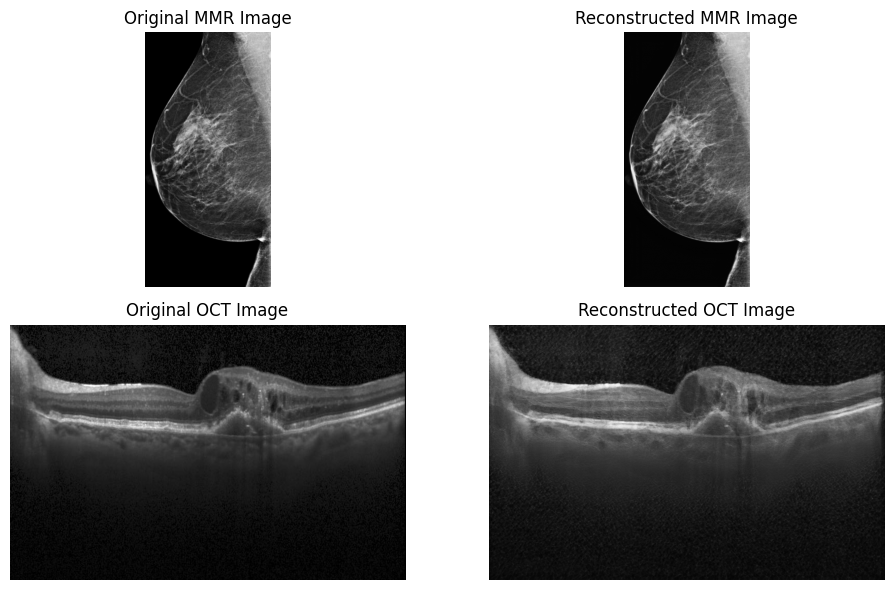

In [4]:
# Create a figure with a 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot the MMR images side by side in the top row
# Plot the original MMR image
axes[0, 0].imshow(img_mmr[0, 0].cpu().numpy(), cmap='gray')
axes[0, 0].set_title('Original MMR Image')
axes[0, 0].axis('off')

# Plot the reconstructed MMR image
axes[0, 1].imshow(decoded_mmr.cpu().numpy(), cmap='gray')
axes[0, 1].set_title('Reconstructed MMR Image')
axes[0, 1].axis('off')

# Plot the CNV images stacked in the bottom row
# Plot the original CNV image
axes[1, 0].imshow(img_cnv[0, 0].cpu().numpy(), cmap='gray')
axes[1, 0].set_title('Original OCT Image')
axes[1, 0].axis('off')

# Plot the reconstructed CNV image
axes[1, 1].imshow(decoded_cnv.cpu().numpy(), cmap='gray')
axes[1, 1].set_title('Reconstructed OCT Image')
axes[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()